## Data Mining - SoSe 2018 - Extra: kmeans and GMM

**Note**: Content from Jake Vanderplas' excellent "Python Data Science Handbook"

<img src="https://covers.oreillystatic.com/images/0636920034919/lrg.jpg" width="200" height="200" />

https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import random

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=1.8, random_state=0)
#X = X[:, ::-1] # flip axes for better plotting

In [145]:
y_true

array([3, 2, 2, 0, 2, 3, 1, 0, 2, 1, 3, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       3, 0, 0, 3, 3, 0, 0, 1, 0, 0, 2, 0, 2, 3, 1, 0, 1, 0, 2, 3, 1, 0,
       1, 3, 1, 1, 1, 3, 3, 3, 2, 3, 3, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2,
       1, 0, 2, 3, 2, 0, 2, 3, 1, 2, 0, 2, 3, 2, 2, 0, 1, 3, 0, 2, 2, 0,
       2, 1, 2, 1, 0, 2, 2, 3, 0, 1, 1, 1, 3, 1, 0, 0, 2, 3, 0, 3, 1, 2,
       2, 2, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 0, 3, 1, 1, 1, 0, 3, 3,
       3, 2, 0, 2, 3, 0, 3, 2, 0, 2, 2, 3, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0,
       3, 2, 1, 2, 2, 2, 0, 2, 3, 2, 2, 3, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1,
       0, 2, 0, 3, 0, 3, 2, 0, 3, 2, 3, 0, 0, 3, 0, 0, 3, 2, 3, 3, 3, 1,
       1, 0, 0, 2, 1, 1, 3, 0, 2, 3, 0, 3, 0, 0, 1, 1, 3, 1, 0, 3, 1, 3,
       2, 0, 3, 2, 2, 2, 1, 3, 0, 3, 0, 2, 0, 0, 3, 1, 2, 1, 0, 2, 1, 0,
       0, 3, 1, 0, 3, 0, 1, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 3, 0, 2, 2, 2,
       3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3,
       1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 3,

In [147]:
X


array([[ 3.24670493e+00,  3.79388105e+00],
       [-5.04015140e+00,  1.73007715e+00],
       [-5.64642009e+00,  3.37055421e+00],
       [ 1.56311572e-01,  4.33524981e+00],
       [-4.55309680e+00,  1.31773382e+00],
       [-2.61242332e+00,  7.74530865e+00],
       [ 2.55913180e+00,  7.20992959e-01],
       [-1.92874605e+00,  3.92085482e+00],
       [-2.31744515e+00,  3.24429143e+00],
       [ 1.19188706e+00,  2.01430860e+00],
       [-3.51761446e-01,  7.78831399e+00],
       [ 3.44712288e+00, -1.23332149e+00],
       [ 5.06182840e+00,  1.68592911e+00],
       [-4.13066647e+00,  4.35841857e+00],
       [ 6.77863002e-01,  3.03462325e+00],
       [ 5.57590968e+00,  1.59983164e+00],
       [-2.37085955e+00, -1.04471205e+00],
       [ 7.59979622e-01, -5.65723719e-01],
       [ 1.70048503e+00,  3.07112916e+00],
       [-6.29261518e-01,  4.80423214e+00],
       [-1.38373306e-01,  4.77087215e+00],
       [-3.16267786e+00,  2.15411054e+00],
       [-3.36798791e+00,  5.78310667e+00],
       [ 1.

## Interactive kmeans

The k-means algorithm is a simple example of an "Expectation-Maximization (EM)" algorithm. In essence, it consists of two steps for the classification:

1. For each point, determine the closest cluster center and assign its label (Expectation step)
2. Update cluster centers to the mean of all points belonging to the cluster (Maximization step)

Here is a very nice and intuitive interactive visualization of this approach. Try adjusting the number of clusters to see how the clustering chagnes (and especially where it fails):

In [2]:
gempy_model = pd.read_csv('../data/gempy_model_3layers_tilted.csv')

In [3]:
gempy_model

,layer,x,y,z
0,0,157.0,157.0,-5.25
1,0,157.0,157.0,-15.75
2,0,157.0,157.0,-26.25
3,0,157.0,157.0,-36.75
4,0,157.0,157.0,-47.25
5,0,157.0,157.0,-57.75
6,0,157.0,157.0,-68.25
7,0,157.0,157.0,-78.75
8,0,157.0,157.0,-89.25
9,0,157.0,157.0,-99.75


In [46]:
gempy_model = pd.read_csv('../data/gempy_model_3layers_tilted.csv')

# X, y = create_syn_well_data(gempy_model, 4, 0.001)

In [47]:
well_model = gempy_model

In [48]:
layer = list(set(well_model.layer))
n_layers = len(layer)
len_boreholes = int(np.round(len(well_model)**(1/3))-1)
    
# drop basement values
for i in range(int(len_boreholes**2+2*len_boreholes+1)):
    well_model = well_model.drop(len_boreholes+20*i)
well_model = well_model.reset_index(drop=True)

In [50]:
BH_total = pd.DataFrame()

for i in range(0,n_boreholes):
    a = len_boreholes* random.randint(0, int(len(well_model)/len_boreholes)-1)
    BH = well_model[a : a + len_boreholes]
    BH['well name'] = 'BH{0}'.format(i+1) 
    BH_total = pd.concat([BH,BH_total])  

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
np.where(well_model.layer == list(set(well_model.layer))[3])[0]

IndexError: list index out of range

In [59]:
n_features = 2
length = []
form_std = 0.01

for i in range(len(set(well_model.layer))):
    length.append(len(np.where(well_model.layer == list(set(well_model.layer))[i])[0]))
    print(length)
    X, y = make_blobs(n_samples = max(length) * 3, n_features = n_features, 
                  centers = len(set(well_model)),
                      random_state=42, cluster_std=form_std)

[2654]
[2654, 2990]
[2654, 2990, 1956]


In [249]:
def create_syn_well_data(well_model, n_boreholes ,n_features, form_std):
    
    # well_model.layer = np.asarray(well_model.layer) - min(well_model.layer)
    len_boreholes = int(np.round(len(well_model)**(1/3)) -1)
    
    # drop basement values
    for i in range(int(len_boreholes**2+2*len_boreholes+1)):
        well_model = well_model.drop(len_boreholes+20*i)
    well_model = well_model.reset_index(drop=True)
    
    # extract random wells from the Gempy model
    BH_total = pd.DataFrame()
    for i in range(0,n_boreholes):
        a = len_boreholes* random.randint(0, int(len(well_model)/len_boreholes)-1)
        BH = well_model[a : a + len_boreholes]
        BH['Well Name'] = 'BH{0}'.format(i+1) 
        BH_total = pd.concat([BH,BH_total]) 
    BH_total = BH_total.reset_index(drop=True)
    
    layer = list(set(BH_total.layer))
    n_layers = len(layer)
    
    length = []
    for i in range(n_layers):
        length.append(len(np.where(BH_total.layer == layer[i])[0]))
        
    X, y = make_blobs(n_samples = max(length) * 3, n_features = n_features, 
                  centers = n_layers,
                      random_state=42, cluster_std=form_std)
    
    for j in range(n_features):
        for i in range(n_layers):
            BH_total.loc[np.where(BH_total.layer == layer[i])[0],'feature{0}'.format(j+1)] = (
                    X[np.where(y ==layer[i])[0],j][:len(np.where(BH_total.layer == layer[i])[0])] )   

        
    return BH_total

In [254]:
gempy_model = pd.read_csv('../data/gempy_model_3layers_tilted.csv')

well_data2 = create_syn_well_data(gempy_model, n_boreholes = 5, 
                                            n_features = 4, form_std = 0.1)

well_data2.to_csv('../data/test.csv', index = False)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [253]:
well_data2.to_csv('../data/test.csv', index = False)

In [153]:
well_data2.loc[a,'feature{0}'.format(0+1)] = X[b[0],0]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [199]:
a = np.where(well_data2.layer == layer[0])[0]
a

array([ 0,  1,  2,  3,  4,  5,  6,  7, 19, 20, 21, 22, 38, 39, 40, 41, 42,
       43, 44], dtype=int64)

In [200]:
b = np.where(y ==layer[0])
b

(array([ 2,  3,  5, 14, 16, 17, 24, 26, 28, 30, 41, 42, 44, 45, 46, 47, 48,
        50, 51, 53, 57, 60, 64, 71], dtype=int64),)

In [202]:
well_data2.loc[a,'feature0'] = X[b[0],0][:len(a)]

In [203]:
well_data2

,layer,x,y,z,well name,feature0
0,0,115.0,109.0,-5.25,BH3,-2.509742
1,0,115.0,109.0,-15.75,BH3,-2.509799
2,0,115.0,109.0,-26.25,BH3,-2.510349
3,0,115.0,109.0,-36.75,BH3,-2.509130
4,0,115.0,109.0,-47.25,BH3,-2.508874
5,0,115.0,109.0,-57.75,BH3,-2.510210
6,0,115.0,109.0,-68.25,BH3,-2.509313
7,0,115.0,109.0,-78.75,BH3,-2.510923
8,2,115.0,109.0,-89.25,BH3,NaN
9,2,115.0,109.0,-99.75,BH3,NaN


In [119]:
X[np.where(y ==layer[0])]

array([[-2.50921112,  9.01322842],
       [-2.50773197,  9.01406035],
       [-2.50895566,  9.01237285],
       [-2.50837508,  9.01306528],
       [-2.50979933,  9.01613841],
       [-2.51092254,  9.01372384],
       [-2.50979826,  9.01399443],
       [-2.5096671 ,  9.01482869],
       [-2.51052581,  9.01448299],
       [-2.50974201,  9.01439705],
       [-2.51034862,  9.01466183],
       [-2.50761841,  9.01505356],
       [-2.50845916,  9.0144575 ],
       [-2.51010565,  9.01287382],
       [-2.50931327,  9.01398502],
       [-2.51067615,  9.01356628],
       [-2.50966104,  9.0138204 ],
       [-2.51021045,  9.01460038],
       [-2.50913009,  9.01286138],
       [-2.50898876,  9.01232646]])

In [ ]:
well_data

In [67]:
well_data2

,layer,x,y,z,well name
4731,0,85.0,103.0,-5.25,BH10
4732,0,85.0,103.0,-15.75,BH10
4733,0,85.0,103.0,-26.25,BH10
4734,0,85.0,103.0,-36.75,BH10
4735,0,85.0,103.0,-47.25,BH10
4736,0,85.0,103.0,-57.75,BH10
4737,2,85.0,103.0,-68.25,BH10
4738,2,85.0,103.0,-78.75,BH10
4739,2,85.0,103.0,-89.25,BH10
4740,2,85.0,103.0,-99.75,BH10


In [39]:
def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import numpy as np

from ipywidgets import interact
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=200, centers=5,
                      random_state=0, cluster_std=1.10)
        
    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);
            
    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(centers.shape[0]),
                    s=200, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)
            

    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = int(frame // 3)

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plt.figure(figsize=(8,8))
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], 
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                     ha='right', va='top', size=14)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                     ha='right', va='top', size=14)
        plt.show()
    
    return interact(_kmeans_step, frame=(0, 50),
                    n_clusters=(min_clusters, max_clusters))

plot_kmeans_interactive();

interactive(children=(IntSlider(value=0, description='frame', max=50), IntSlider(value=4, description='n_clusters', max=6, min=1), Output()), _dom_classes=('widget-interact',))

Here is also a static figure of the approach, with a presentation of some update steps:

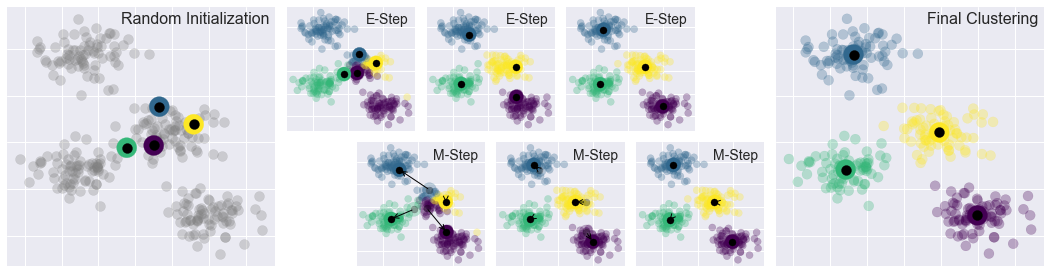

In [3]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


fig.savefig('05.11-expectation-maximization.png')